# **Pythonを用いたサービス産業動向調査の可視化**

まず初めに，可視化したデータを「ドライブ」に保存するために，Pythonとドライブを紐付けにします。
下のコードを実行し，URLが表示されたらそれにアクセスし，新規のタブで自分のアカウントでログイン認証をしてください。
認証後に表示されるものをコピーし，GoogleColaboratoryのタブの先程の続きにペーストしてください。

In [96]:
from google.colab import drive  
drive.mount('./gdrive')  

Drive already mounted at ./gdrive; to attempt to forcibly remount, call drive.mount("./gdrive", force_remount=True).


一応紐付けされたか確認します。

In [97]:
!ls ./gdrive/MyDrive

 42鉄道業.pdf
 AO
'ASCII　文字コード .gdoc'
 classrec.pdf
 Classroom
'Colab Notebooks'
 Googleカレンダー（行事予定）.gsheet
'Googleカレンダー連携（個人） .gsheet'
 Googleカレンダー連携（共有）.ods
 No_03.gdoc
 No_05.gdoc
'Pythonを用いたサービス産業動向調査の可視化 (1).ipynb'
'Pythonを用いたサービス産業動向調査の可視化 (2).ipynb'
 Pythonを用いたサービス産業動向調査の可視化.ipynb
'コピー ～ コピー ～ コピー ～ コピー ～ ②R3_個人用学習時間の記録.gform'
 Untitled0.ipynb
 Untitled1.ipynb
 学習の記録
'最新学習の記録（回答） (1).gsheet'
 最新学習の記録（回答）.gsheet
 最新学習の記録（回答）.ods
 フォーム自動作成.gsheet
 メール自動送信（例）.gsheet
'菊地康介 - 石原彩野 - ①R3_個人用学習時間記録 .gsheet'
'菊地康介 - 石原彩野 - ①R3_個人用学習時間記録 .ods'
'進数の計算 .gdoc'


グラフを描くためのコードです。

In [98]:
!pip install japanize-matplotlib 
!pip install pandas_estat
from os import linesep
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import japanize_matplotlib
from pandas_estat import set_appid
from pandas_estat import read_statslist
from pandas_estat import read_statsdata 

appID = "235a2cbfcc699d7fec27c88d2f3af36197751c1e" 
set_appid(appID) 

# 「サービス産業動向調査」の政府統計コードを指定する
statslist = read_statslist("00200544")  
statslist = statslist[statslist.CYCLE == "月次"] 
statslist[["TABLE_INF", "TITLE"]]

#　「事業活動の産業(中分類)別売上高」のコードを指定する
df = read_statsdata("0003191203")  
df.columns
set(df["事業活動の産業"])

{'37通信業',
 '38放送業',
 '39情報サービス業',
 '4*航空運輸業，郵便業（信書便事業を含む）',
 '40インターネット附随サービス業',
 '41映像・音声・文字情報制作業',
 '42鉄道業',
 '43道路旅客運送業',
 '44道路貨物運送業',
 '45水運業',
 '47倉庫業',
 '48運輸に附帯するサービス業',
 '68不動産取引業',
 '69不動産賃貸業・管理業',
 '70物品賃貸業',
 '72専門サービス業（他に分類されないもの）\u3000（※「純粋持株会社」（平成25年１月以降）を除く）',
 '73広告業',
 '74技術サービス業（他に分類されないもの）',
 '75宿泊業',
 '76飲食店',
 '77持ち帰り・配達飲食サービス業',
 '78洗濯・理容・美容・浴場業',
 '79その他の生活関連サービス業\u3000（※「家事サービス業」を除く）',
 '80娯楽業',
 '82aうち社会教育，職業・教育支援施設',
 '82bうち学習塾，教養・技能教授業',
 '82その他の教育，学習支援業',
 '83医療業',
 '84保健衛生\u3000（※「保健所」を除く）',
 '85社会保険・社会福祉・介護事業\u3000（※「社会保険事業団体」（平成25年１月以降）及び「福祉事務所」を除く）',
 '88廃棄物処理業',
 '89自動車整備業',
 '90機械等修理業（別掲を除く）',
 '91職業紹介・労働者派遣業',
 '92その他の事業サービス業',
 '95その他のサービス業',
 'その他',
 'サービス産業計',
 '合計',
 'Ｇ情報通信業',
 'Ｈ運輸業，郵便業',
 'Ｋ不動産業，物品賃貸業',
 'Ｌ学術研究，専門・技術サービス業\u3000（※「学術・開発研究機関」（平成25年１月以降）及び「純粋持株会社」（平成25年１月以降）を除く）',
 'Ｍ宿泊業，飲食サービス業',
 'Ｎ生活関連サービス業，娯楽業\u3000（※「家事サービス業」を除く）',
 'Ｏ教育，学習支援業\u3000（※「学校教育」を除く）',
 'Ｐ医療，福祉（※「保健所」、「社会保険事業団体」（平成25年１月以降）及び「福祉事務所」を除く）',
 'Ｒサービス業（他に分類されないもの）\u3000（

次に "サービス産業計"，"37通信業"，"38放送業"，"39情報サービス業"，"41映像・音声・文字情報制作業"，"42鉄道業"，"43道路旅客運送業"，"44道路貨物運送業"，"47倉庫業"，"73広告業"，"75宿泊業"，"76飲食店"，"77持ち帰り・配達飲食サービス業"，"80娯楽業"，"83医療業"の中から自分の調べたい業種名を指定します。



In [99]:
# 自分の調べたい業種を"i"とする
i = "42鉄道業"

In [102]:
ndf = df[df["事業活動の産業"] == i ]

#　2020年のデータを取得する
ndf1 = ndf[ndf["時間軸（月次）"].str.contains("2020年")]
ndfa = ndf1[["時間軸（月次）", "value", "unit"]]

# DateFrameからvaluesに変換する
x = ndfa["時間軸（月次）"].values

# XX億円に換算する
y = ndfa["value"].values.astype(float) * 1.e-2  

上から14行目のax.plotのところで「c="xxx"」と「mec="xxx"」のところは自分の好きな色の名称を入れてみてください。色の名称は以下を参照してください。

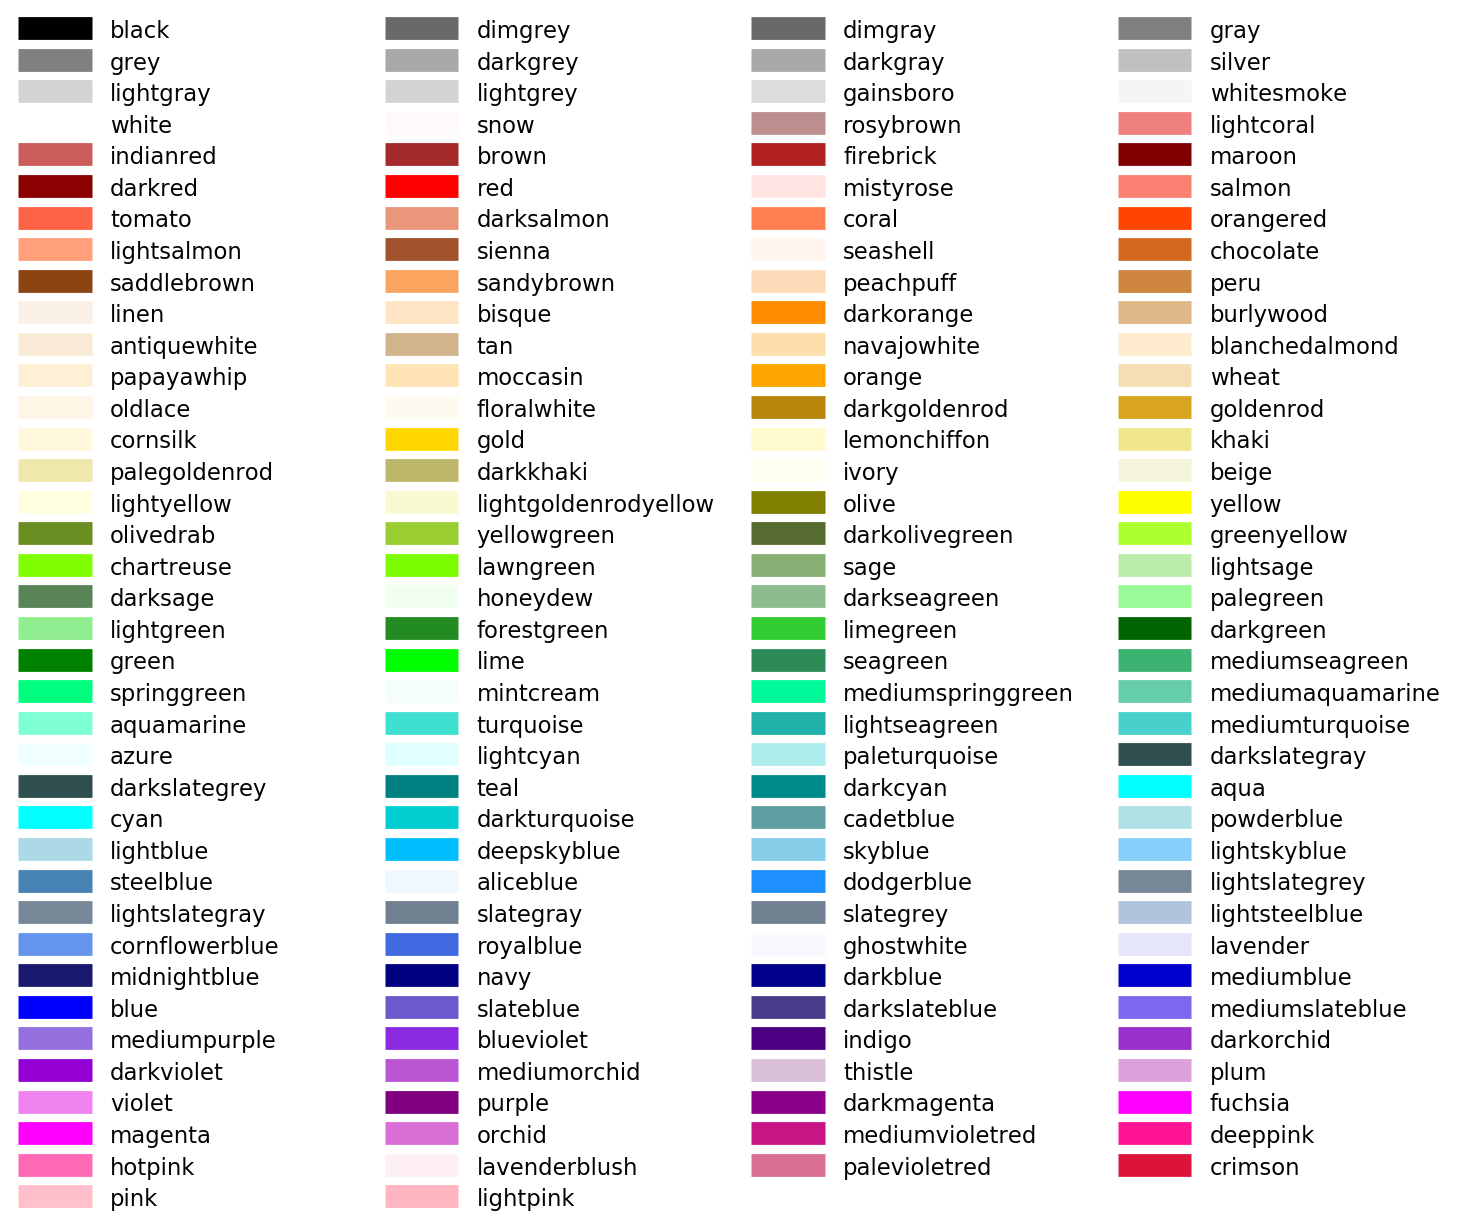

No handles with labels found to put in legend.


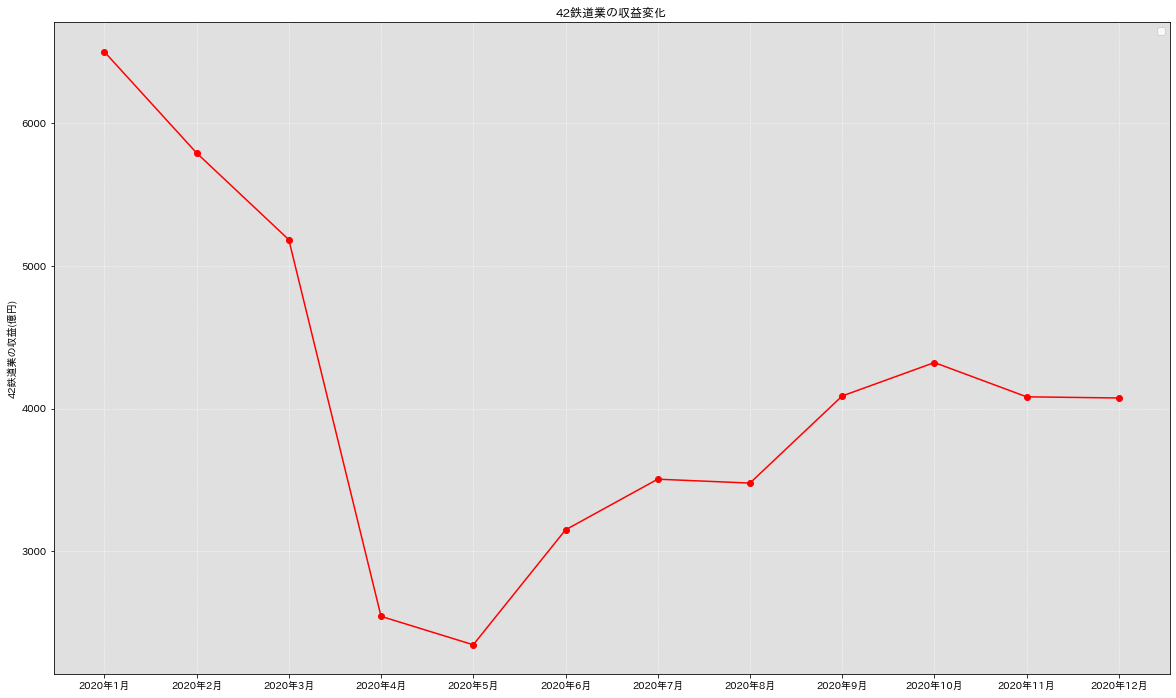

In [103]:
#　書式を設定する
fig = plt.figure(figsize=(20, 12)) 
ax = fig.add_subplot(111)  
ax.set_facecolor("#e0e0e0")
    
#　グラフに可視化する
ax.set_ylabel(str(i)+"の収益(億円)")
ax.grid(True,axis="both",color="w", linestyle="dotted", linewidth=0.8,zorder=1)
ax.set_title(str(i)+"の収益変化")

# 好きな色の名称をを指定する
ax.plot(x,y,marker="o",zorder=100,c="red",mec="red")
ax.legend()

plt.savefig("./gdrive/MyDrive/"+str(i)+".pdf")

#　コンピュータ上にグラフを表示する
plt.show()
plt.close()

GoogleColaboratory上にも表示されましたが，「ドライブ」にも同じものが"pdf"として保存してあるはずです。
確認してみてください。